## 1. Import Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2. Import dataset

In [4]:
df = pd.read_csv('Position_Salaries.csv')

In [5]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [7]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## 3. Create Independent Variable

In [9]:
X = df.iloc[:,1:2].values

In [10]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

## 4. Create Dependent Variable

In [11]:
y = df.iloc[:,2:].values

In [12]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## 5. Missing Values

### Check for missing values in dataframe

In [14]:
df.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

## 6. Fitting Random Forest Regression

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)

In [47]:
regressor.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

## 7. Predict a new result

In [48]:
y_pred = regressor.predict([[6.5]])

In [49]:
y_pred

array([160333.33333333])

## 8. Visualising the Random Forest Regression

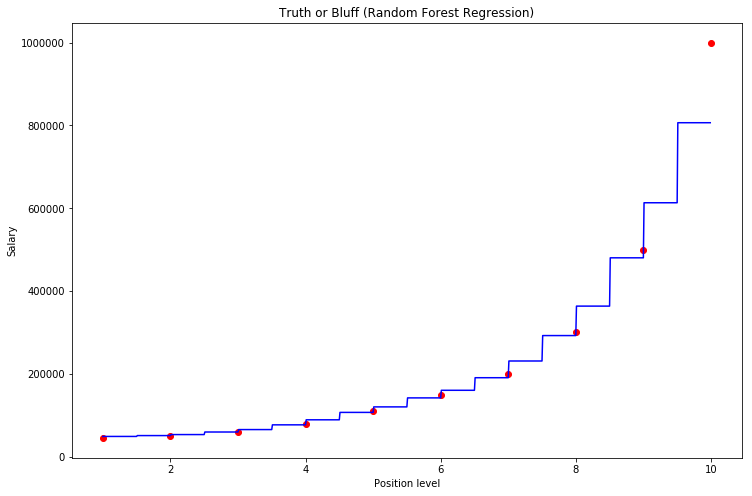

In [50]:
plt.figure(figsize=(12,8))
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()